<a href="https://colab.research.google.com/github/DawidK4/BSEPrediction/blob/main/OptionPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes/To-dos

**Regression Models:** Since the strike price is a continuous variable, regression models are a natural fit.
* Linear Regression: A simple baseline model that assumes a linear relationship between features and strike price.
* Polynomial Regression: Can capture non-linear relationships between features and strike price.
* Support Vector Regression (SVR): Effective for handling non-linear data and can be robust to outliers.
* Decision Tree Regressor: Can capture complex non-linear relationships and interactions between features.
* Random Forest Regressor: An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.
* Gradient Boosting Regressors (e.g., Gradient
* Boosting Machines, XGBoost, LightGBM): Powerful ensemble methods that build trees sequentially, correcting errors from previous trees.

**Time Series Models:** If you have time-series data where the strike price evolves over time, time series models can be useful.
* ARIMA: A statistical model that can capture seasonality, trend, and other time-series patterns.
* Prophet: A time series forecasting library developed by Facebook, good for data with strong seasonality and holidays.
* LSTM (Long Short-Term Memory) Networks: A type of recurrent neural network (RNN) that is well-suited for sequential data like time series.

**Machine Learning Models with Feature Engineering:** You can use a variety of machine learning models and improve their performance by carefully engineering relevant features from your data. Consider features like:
* Underlying asset price
* Volatility (historical or implied)
* Time to expiration
* Interest rates
* Option type (call or put)
* Historical strike price data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

import tensorflow as tf

In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Datasets/options_temp.csv'

data = pd.read_csv(file_path)

print(data.head())

Mounted at /content/drive
   Unnamed: 0 INSTRUMENT     SYMBOL    EXPIRY_DT  STRIKE_PR OPTION_TYP  \
0      160393     FUTIDX  BANKNIFTY  29-Aug-2019        0.0         XX   
1      160394     FUTIDX  BANKNIFTY  26-Sep-2019        0.0         XX   
2      160395     FUTIDX  BANKNIFTY  31-Oct-2019        0.0         XX   
3      160396     FUTIDX      NIFTY  29-Aug-2019        0.0         XX   
4      160397     FUTIDX      NIFTY  26-Sep-2019        0.0         XX   

       OPEN      HIGH       LOW     CLOSE  SETTLE_PR  CONTRACTS  VAL_INLAKH  \
0  28805.65  28924.00  28140.55  28499.30   28499.30   214569.0  1225914.96   
1  28926.40  29030.55  28251.70  28611.45   28611.45     2484.0    14245.95   
2  29000.00  29105.00  28355.55  28699.05   28699.05      598.0     3434.43   
3  11098.40  11098.40  10901.10  11015.35   11015.35   199881.0  1650955.24   
4  11136.35  11145.20  10955.00  11066.60   11066.60     5283.0    43841.57   

     OPEN_INT  CHG_IN_OI    TIMESTAMP  
0   1675780.0 

In [5]:
data.head()

,Unnamed: 0,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PR,OPTION_TYP,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI,TIMESTAMP
0,160393,FUTIDX,BANKNIFTY,29-Aug-2019,0.0,XX,28805.65,28924.00,28140.55,28499.30,28499.30,214569.0,1225914.96,1675780.0,234640.0,01-AUG-2019
1,160394,FUTIDX,BANKNIFTY,26-Sep-2019,0.0,XX,28926.40,29030.55,28251.70,28611.45,28611.45,2484.0,14245.95,51400.0,-80.0,01-AUG-2019
2,160395,FUTIDX,BANKNIFTY,31-Oct-2019,0.0,XX,29000.00,29105.00,28355.55,28699.05,28699.05,598.0,3434.43,9460.0,4860.0,01-AUG-2019
3,160396,FUTIDX,NIFTY,29-Aug-2019,0.0,XX,11098.40,11098.40,10901.10,11015.35,11015.35,199881.0,1650955.24,19001400.0,1339200.0,01-AUG-2019
4,160397,FUTIDX,NIFTY,26-Sep-2019,0.0,XX,11136.35,11145.20,10955.00,11066.60,11066.60,5283.0,43841.57,893625.0,66750.0,01-AUG-2019


# EDA

In [6]:
print("Shape of data:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())
display(data.describe())

Shape of data: (2533210, 16)

Data Types:
 Unnamed: 0      int64
INSTRUMENT     object
SYMBOL         object
EXPIRY_DT      object
STRIKE_PR     float64
OPTION_TYP     object
OPEN          float64
HIGH          float64
LOW           float64
CLOSE         float64
SETTLE_PR     float64
CONTRACTS     float64
VAL_INLAKH    float64
OPEN_INT      float64
CHG_IN_OI     float64
TIMESTAMP      object
dtype: object

Missing values:
 Unnamed: 0    0
INSTRUMENT    0
SYMBOL        0
EXPIRY_DT     0
STRIKE_PR     0
OPTION_TYP    0
OPEN          0
HIGH          0
LOW           0
CLOSE         0
SETTLE_PR     0
CONTRACTS     0
VAL_INLAKH    0
OPEN_INT      0
CHG_IN_OI     0
TIMESTAMP     0
dtype: int64


,Unnamed: 0,STRIKE_PR,OPEN,HIGH,LOW,CLOSE,SETTLE_PR,CONTRACTS,VAL_INLAKH,OPEN_INT,CHG_IN_OI
count,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06,2.533210e+06
mean,1.611381e+07,3.681784e+03,3.458899e+01,3.630275e+01,3.303485e+01,3.076770e+02,3.210406e+02,6.242578e+02,4.061064e+03,1.573582e+05,2.429049e+03
std,9.558898e+06,7.834708e+03,6.576684e+02,6.661756e+02,6.502584e+02,1.064385e+03,1.140909e+03,2.070733e+04,1.293172e+05,3.488634e+06,4.554198e+05
min,1.603930e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.328880e+08
25%,7.168838e+06,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+00,3.350000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.586126e+07,5.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.620000e+01,2.920000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.473184e+07,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.632500e+02,1.477000e+02,0.000000e+00,0.000000e+00,8.000000e+02,0.000000e+00
max,3.276994e+07,7.100000e+04,6.664885e+04,6.752930e+04,6.629995e+04,6.664530e+04,6.691670e+04,4.564524e+06,2.875726e+07,6.323800e+08,1.383200e+08


In [14]:
# Types of underlying instruments and stocks
instruments = {instrument for instrument in data['INSTRUMENT']}
print(instruments)

stocks = list({stock for stock in data['SYMBOL']})

stocks_per_line = 6
temp = ''

for i in range(len(stocks)):
    temp += stocks[i] + ' '
    if (i + 1) % stocks_per_line == 0:
        print(temp)
        temp = ''

if temp:
    print(temp)

{'OPTIDX', 'FUTIDX', 'FUTSTK', 'OPTSTK'}
ARVIND IOC RELINFRA ADANIPOWER RBLBANK MUTHOOTFIN 
UJJIVAN COLPAL COALINDIA AMBUJACEM SRTRANSFIN DRREDDY 
DHFL TATACHEM ENGINERSIN DABUR MCX VEDL 
HAVELLS AUROPHARMA UPL HDFCBANK MCDOWELL-N CENTURYTEX 
TITAN ASIANPAINT CIPLA SRF M&M EXIDEIND 
APOLLOTYRE BERGEPAINT SHREECEM BAJAJFINSV GMRINFRA AMARAJABAT 
SBIN MRF FEDERALBNK ULTRACEMCO BANKBARODA OIL 
TECHM NATIONALUM BRITANNIA INFRATEL NESTLEIND BEL 
ASHOKLEY PIDILITIND PAGEIND EICHERMOT MARICO BAJAJ-AUTO 
ESCORTS CASTROLIND KOTAKBANK MFSL NTPC TATAGLOBAL 
AXISBANK WIPRO ICICIPRULI VOLTAS HDFC STAR 
OFSS ZEEL TATAMOTORS TCS BIOCON BAJFINANCE 
SUNTV DISHTV GLENMARK CHOLAFIN JINDALSTEL BHARTIARTL 
BPCL RAMCOCEM ADANIPORTS DIVISLAB JUSTDIAL LUPIN 
HCLTECH LICHSGFIN PFC CADILAHC BALKRISIND ITC 
RELCAPITAL PNB CONCOR EQUITAS HINDPETRO SUNPHARMA 
JSWSTEEL LT NCC M&MFIN BHEL INDUSINDBK 
TATAMTRDVR CESC HEROMOTOCO DLF NMDC MOTHERSUMI 
NIFTY INDIGO SAIL BSOFT KAJARIACER TATAPOWER 
POWERGRID YESBANK IDBI 

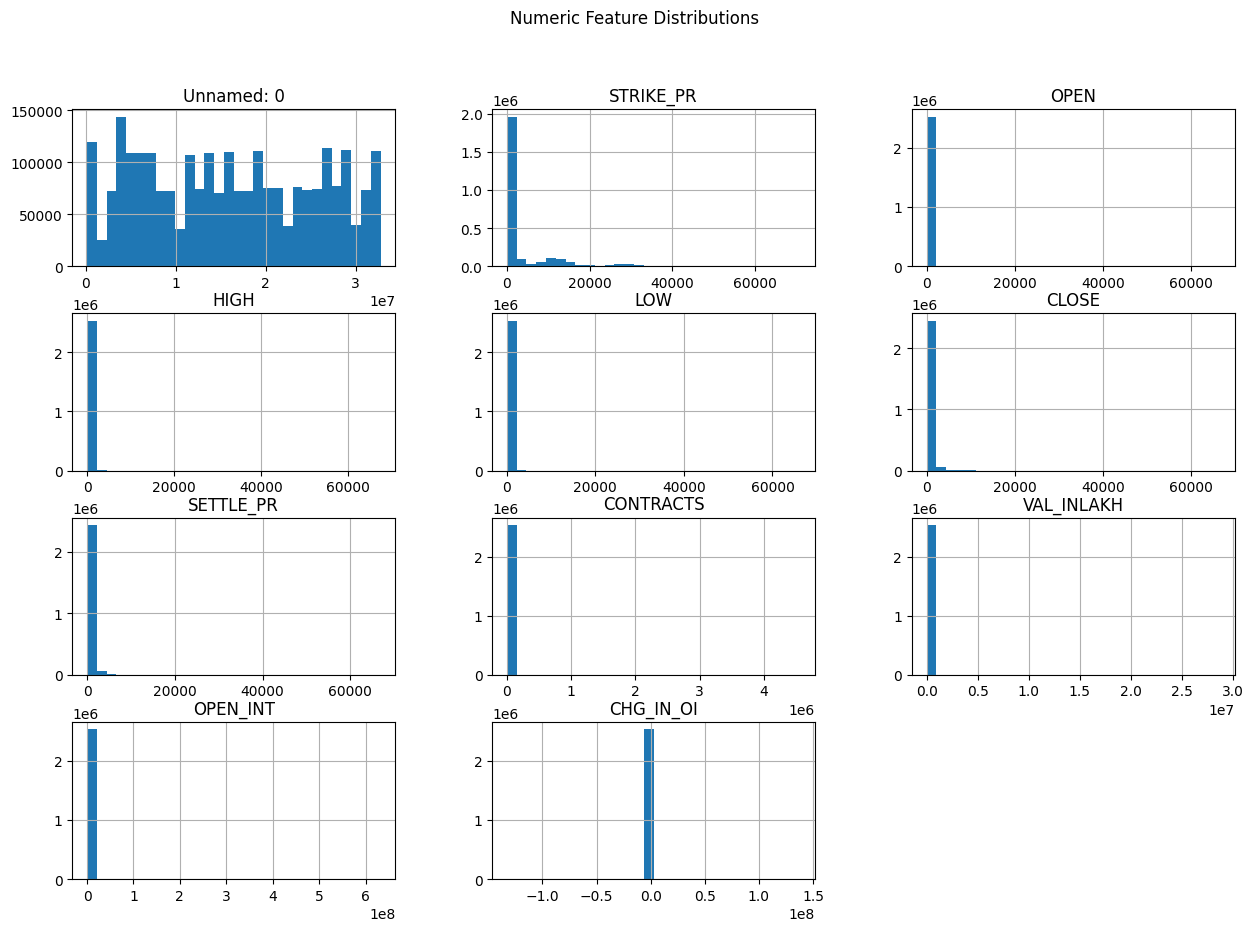

In [7]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()

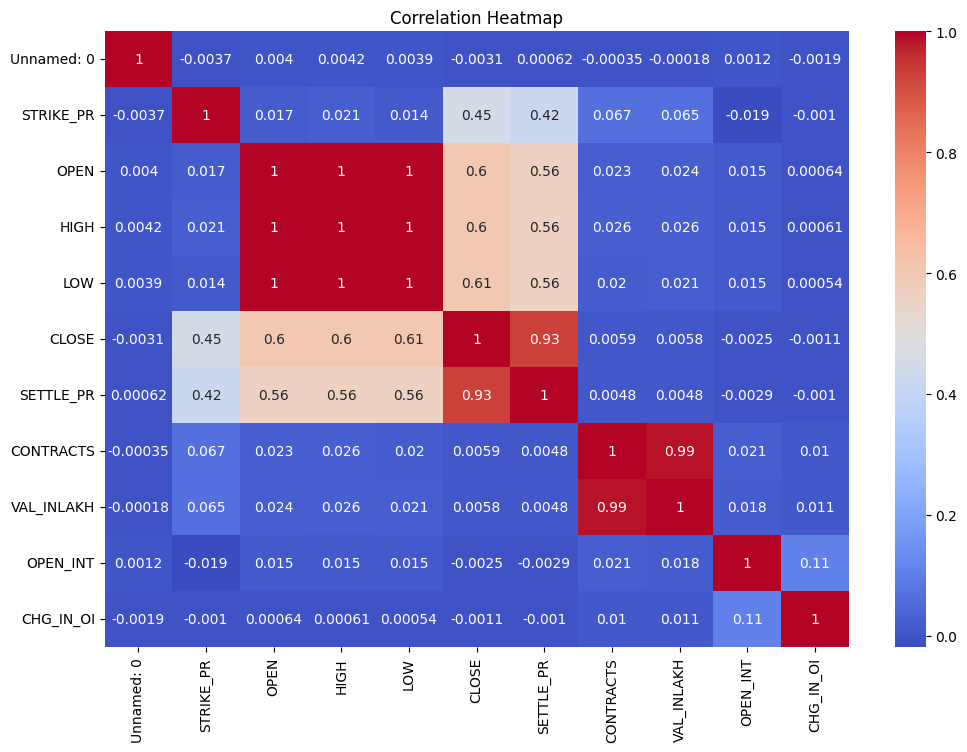

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Model creation

# Regression models

**Linear regression**

has to be fixed

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

numeric_cols = data.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_cols if col != 'STRIKE_PR']

X = data[feature_cols]
y = data['STRIKE_PR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 42275786.25656628
R-squared: 0.311826483398292
Coefficients: [-9.17681723e-07  2.19273835e+01  3.16677433e+01 -5.96515052e+01
  5.08156886e+00  1.86431589e-01  1.94536712e-02 -4.11867869e-05
 -2.87369007e-05  9.33308372e-06]
Intercept: 2130.244450117356


**Polynomial regression**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_poly = LinearRegression()

model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression R-squared: {r2_poly}")

Polynomial Regression Mean Squared Error: 44849374.46136507
Polynomial Regression R-squared: 0.2699331112813872
